In [1]:
import numpy as np
import pandas as pd 


In [2]:
df = pd.read_csv('../data/zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
dic = {}

dic['drop']=[]

In [6]:
dic['drop'].extend(['url','address','phone','menu_item'])

In [16]:
df.drop(columns=dic['drop'],inplace=True)

In [9]:
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [18]:
df['dish_liked'][0]

'Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'

In [22]:
df.isnull().mean()

name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [24]:
drop_null = [ x for x in df.columns if df[x].isnull().mean()>0.4]
drop_null

['dish_liked']

In [25]:
dic['drop_null']=['dish_liked']

In [26]:
df.drop(columns=dic['drop_null'],inplace=True)

In [27]:
df.shape

(51717, 12)

In [29]:
df.dropna(inplace=True)
df.shape

(43533, 12)

In [38]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5','') )

In [44]:
df = df[~(df['rate']=='NEW')]

In [48]:
df = df[~(df['rate']=='-')]

In [50]:
df['rate'] = df['rate'].astype('float')

In [53]:
df['votes'] = df['votes'].astype('int')

In [54]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [59]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','')).astype(np.int16)

In [61]:
mapper = {'Yes':1,'No':0}

In [71]:
df[['online_order','book_table']] = df[['online_order','book_table']].replace(mapper)

In [76]:
df.to_csv('../data/cleaned_dataset.csv')

In [ ]:
# EDA

In [77]:
cat = [ x for x in df.columns if df[x].dtype=='O' ]
num = [ x for x in df.columns if x not in cat]

In [83]:
cat = list(set(cat) - set(['cuisines','reviews_list','name']))

In [84]:
df[cat].nunique()

rest_type          87
listed_in(city)    30
listed_in(type)     7
location           92
dtype: int64

In [91]:
rare0 = list(df[cat[0]].value_counts(normalize=True)[:5].index)

In [105]:
df.iloc[np.where(~df[cat[0]].isin(rare0))[0],6] = 'rare'

In [112]:
rare1 = list(df[cat[1]].value_counts(normalize=True)[:20].index)
df.iloc[np.where(~df[cat[1]].isin(rare1))[0],-1]='rare'

In [116]:
rare2 = list(df[cat[3]].value_counts(normalize=True)[:10].index)
df.iloc[np.where(~df[cat[3]].isin(rare2))[0],5]='rare'

In [117]:
df[cat].nunique()

rest_type           6
listed_in(city)    21
listed_in(type)     7
location           11
dtype: int64

In [119]:
ordi = ['online_order','book_table']

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
df.describe(percentiles=[0.15,0.25,0.5,0.75,0.9,0.95])

,online_order,book_table,rate,votes,approx_cost(for two people)
count,41263.000000,41263.000000,41263.000000,41263.000000,41263.000000
mean,0.656811,0.152776,3.702011,352.683179,603.914063
std,0.474780,0.359776,0.439985,884.177761,464.942973
min,0.000000,0.000000,1.800000,0.000000,40.000000
15%,0.000000,0.000000,3.200000,11.000000,250.000000
25%,0.000000,0.000000,3.400000,21.000000,300.000000
50%,1.000000,0.000000,3.700000,73.000000,500.000000
75%,1.000000,0.000000,4.000000,277.000000,750.000000
90%,1.000000,1.000000,4.200000,869.000000,1200.000000
95%,1.000000,1.000000,4.400000,1706.000000,1500.000000


In [122]:
num = list(set(num) - set(ordi))

In [ ]:
# analysying numeric columns

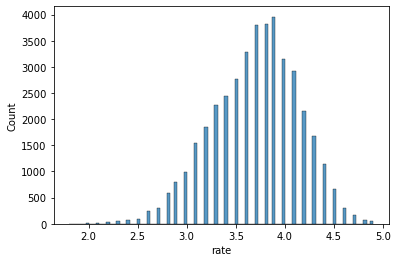

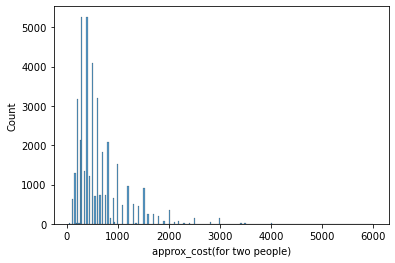

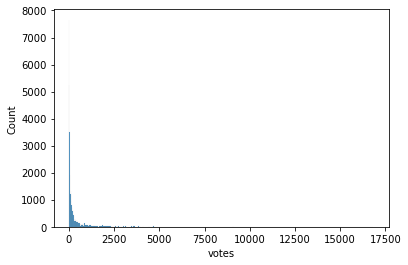

In [123]:
for i in num:
    
    plt.figure()
    sns.histplot(data=df,x=i)

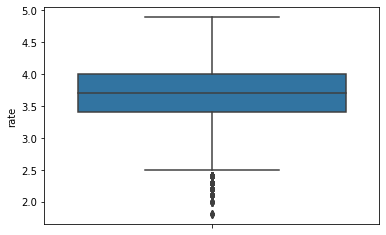

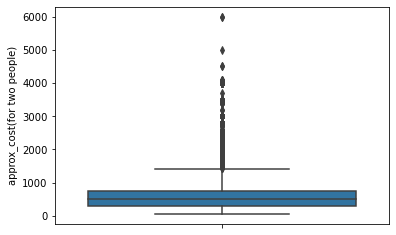

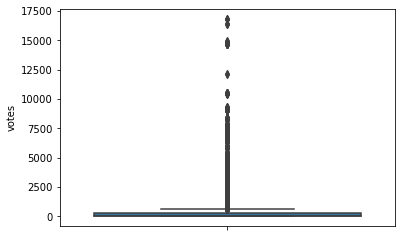

In [125]:
for i in num:
    
    plt.figure()
    sns.boxplot(data=df,y=i)

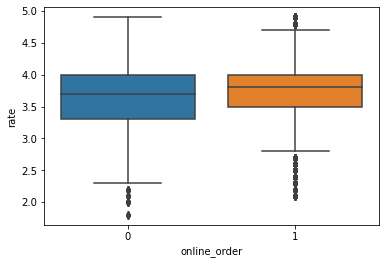

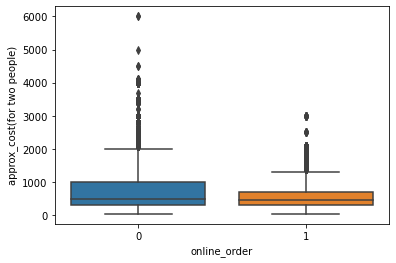

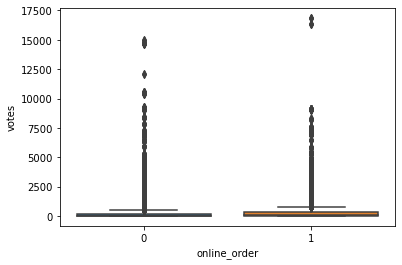

In [133]:
for i in num:
    
   
    plt.figure()
    sns.boxplot(data=df,y=i,x=ordi[0])
    


In [149]:
import time

df.groupby(ordi).count()['rate']

online_order  book_table
0             0             11611
              1              2550
1             0             23348
              1              3754
Name: rate, dtype: int64

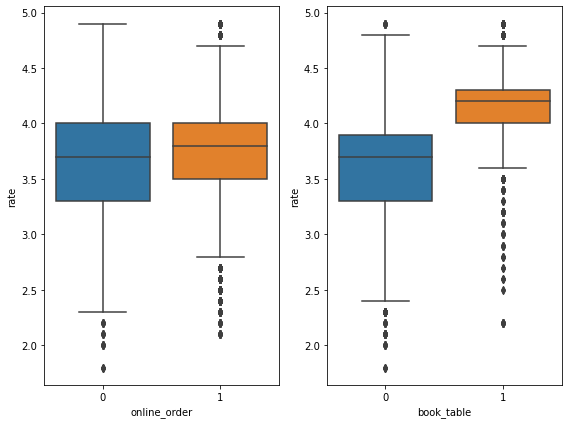

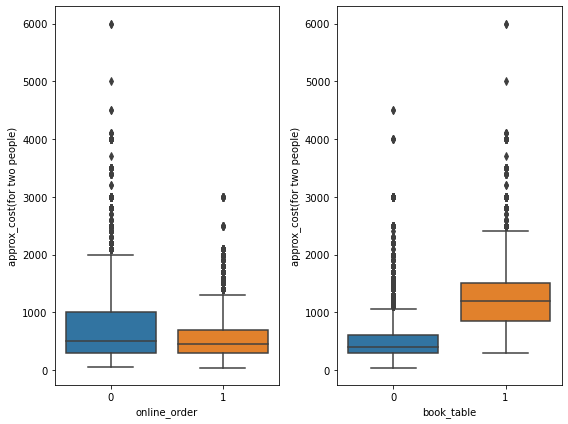

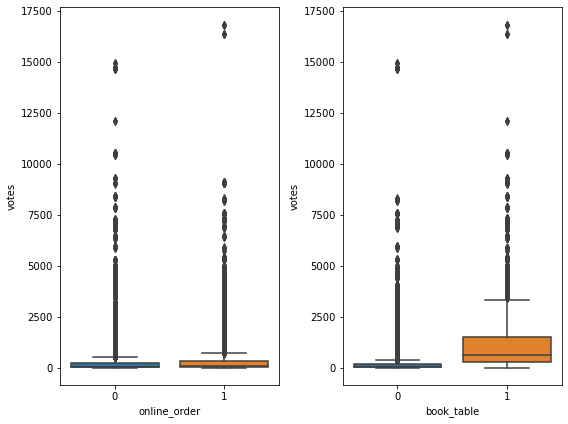

In [145]:
for i in num :
    
    plt.figure(figsize=(8,6))
    plt.subplot(121)
    sns.boxplot(data=df,y=i,x=ordi[0])

    plt.subplot(122)
    sns.boxplot(data=df,y=i,x=ordi[1])
    
    
    plt.tight_layout()
    plt.show()
    print('=====================================================')
    time.sleep(10)

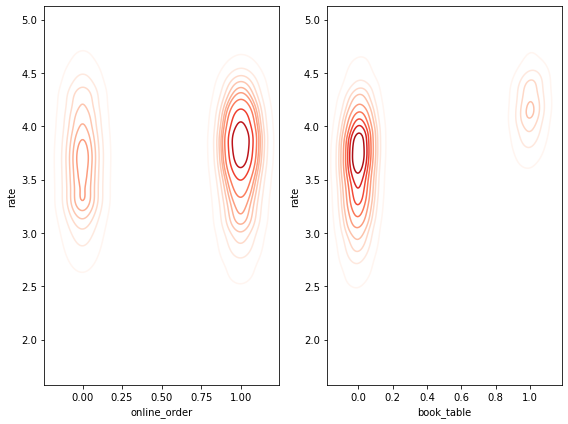

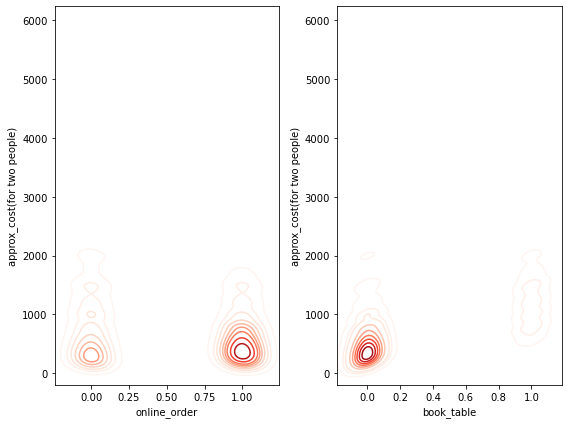

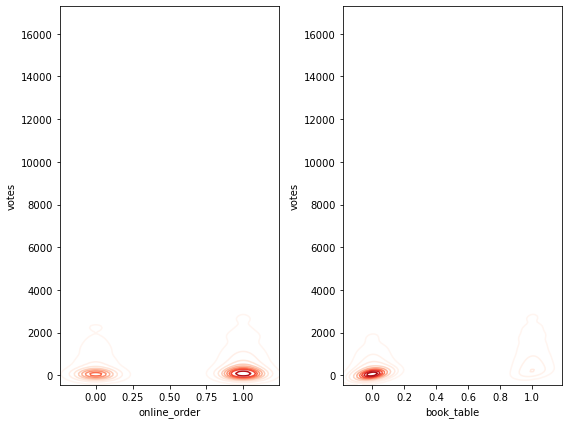

In [153]:
for i in num :
    
    plt.figure(figsize=(8,6))
    plt.subplot(121)
    sns.kdeplot(data=df,y=i,x=ordi[0],cmap='Reds')

    plt.subplot(122)
    sns.kdeplot(data=df,y=i,x=ordi[1],cmap='Reds')
    
    
    plt.tight_layout()
    plt.show()
    print('=====================================================')
    time.sleep(10)

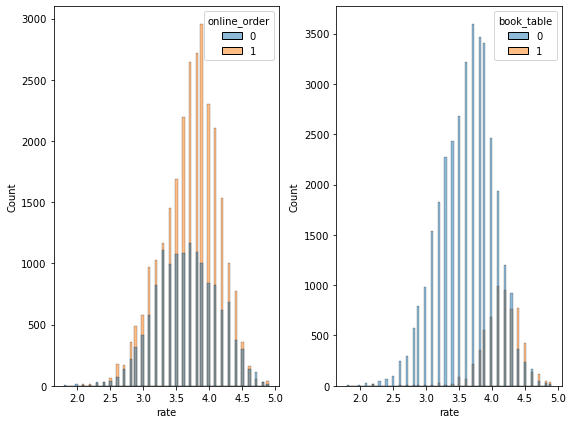

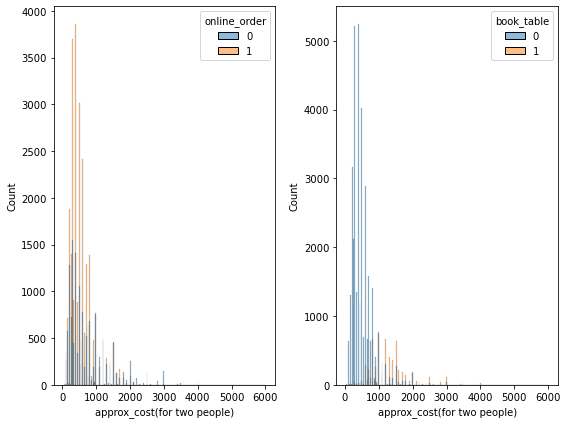

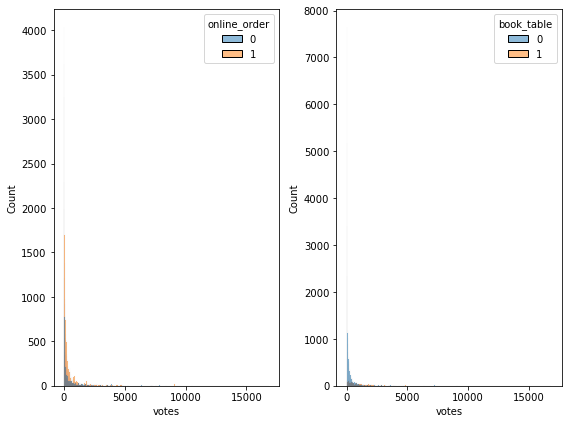

In [159]:
for i in num :
    
    plt.figure(figsize=(8,6))
    plt.subplot(121)
    sns.histplot(data=df,x=i,hue=ordi[0])

    plt.subplot(122)
    sns.histplot(data=df,x=i,hue=ordi[1])
    
    
    plt.tight_layout()
    plt.show()
    print('=====================================================')
    time.sleep(10)

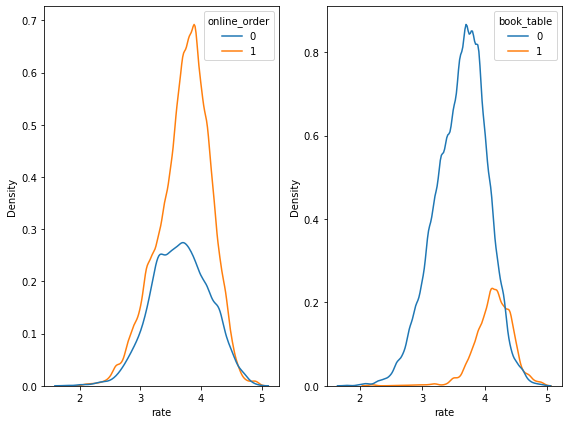

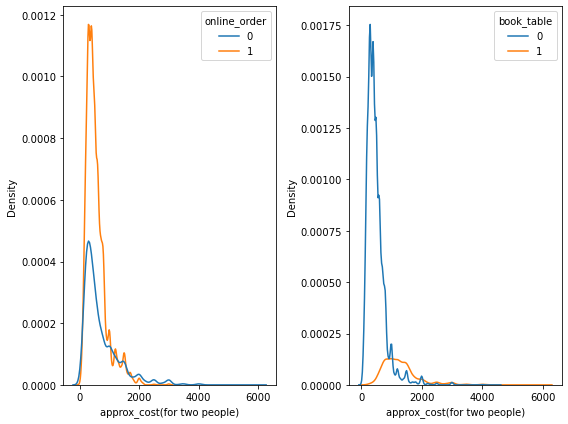

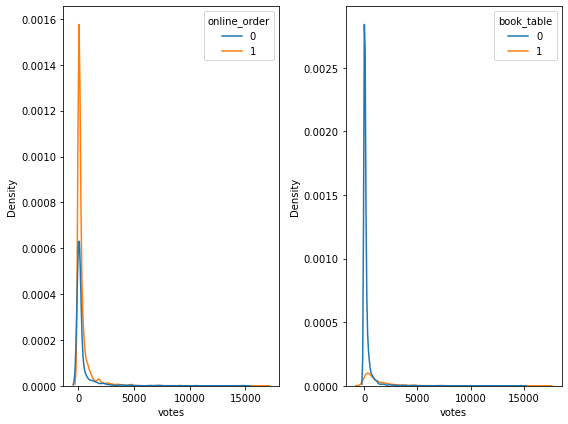

In [158]:
for i in num :
    
    plt.figure(figsize=(8,6))
    plt.subplot(121)
    sns.kdeplot(data=df,x=i,hue=ordi[0])

    plt.subplot(122)
    sns.kdeplot(data=df,x=i,hue=ordi[1])
    
    
    plt.tight_layout()
    plt.show()
    print('=====================================================')
    time.sleep(10)

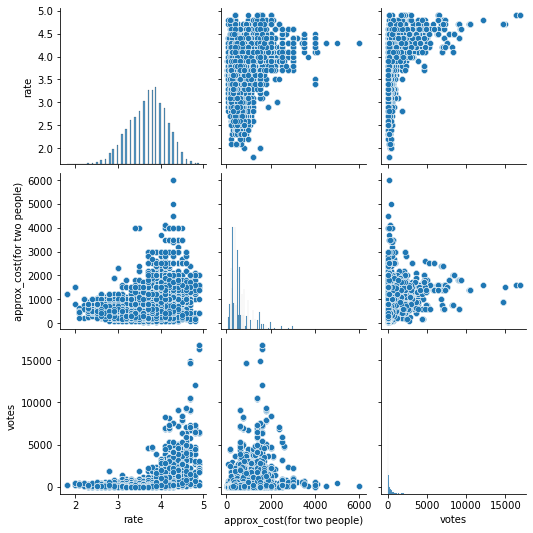

In [161]:
sns.pairplot(df[num])

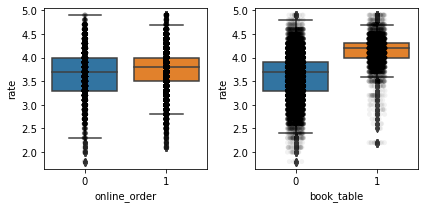

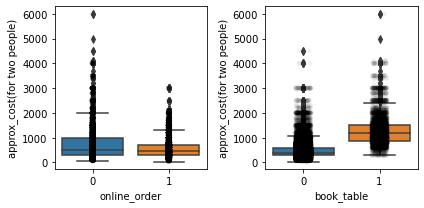

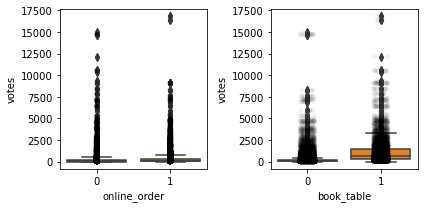

In [192]:
for i in num :
    
    plt.figure(figsize=(6,3))
    plt.subplot(121)
    sns.boxplot(data=df,y=i,x=ordi[0])
    sns.stripplot(data=df,y=i,x=ordi[0],jitter=0.01,alpha=0.05,color='k')

    plt.subplot(122)
    sns.boxplot(data=df,y=i,x=ordi[1])
    sns.stripplot(data=df,y=i,x=ordi[1],jitter=0.1,alpha=0.05,color='k')
    
    
    plt.tight_layout()
    plt.show()
    print('=====================================================')
    time.sleep(10)
    


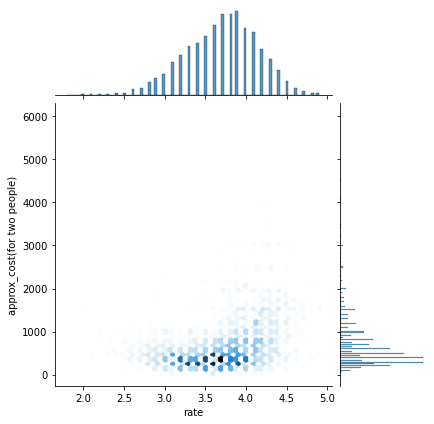

In [204]:
sns.jointplot(data=df,x = num[0],y=num[1],kind='hex',space=0.1,ratio=3)

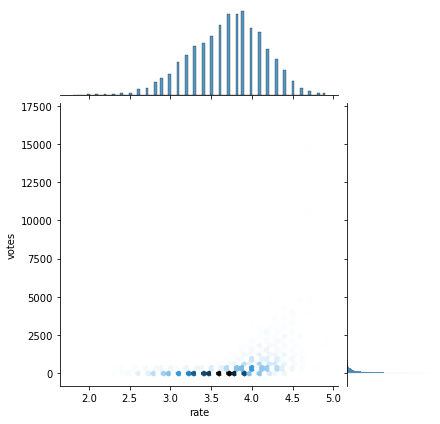

In [205]:
sns.jointplot(data=df,x = num[0],y=num[2],kind='hex',space=0.1,ratio=3)

In [220]:
def hexbin(x,y,**kwags):
    
   
    plt.hexbin(x,y,gridsize=20,cmap='Reds',**kwags)

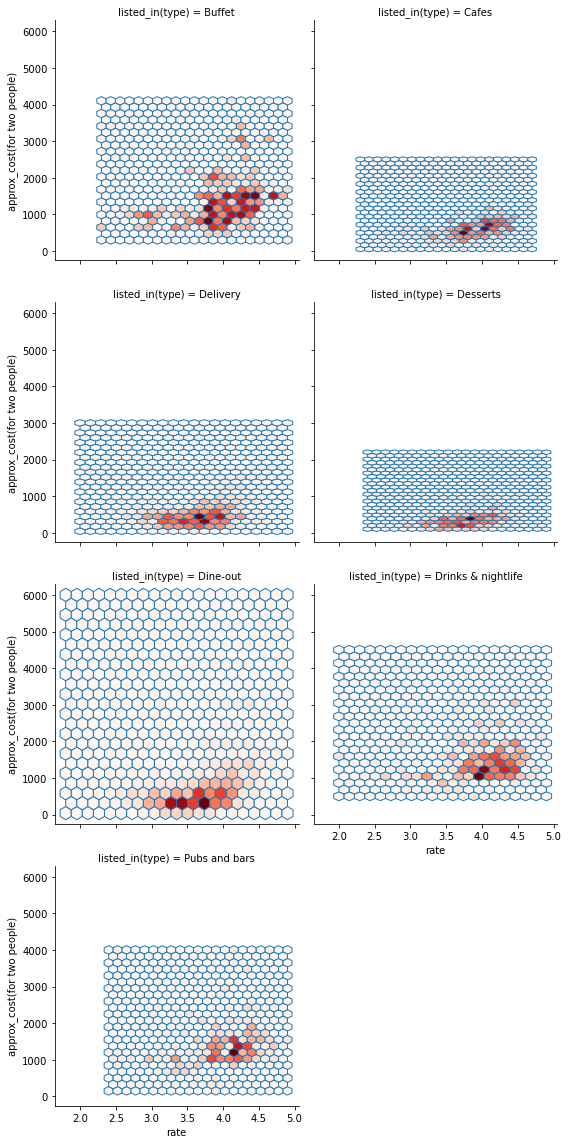

In [228]:
grid = sns.FacetGrid(data=df,col=cat[2],height=4,col_wrap=2)
grid.map(hexbin,num[0],num[1])

In [236]:
dd = df[num].describe(percentiles=[0.15,0.25,0.5,0.75,0.9,0.95])

In [237]:
from scipy import stats

In [238]:
dd

,rate,approx_cost(for two people),votes
count,41263.000000,41263.000000,41263.000000
mean,3.702011,603.914063,352.683179
std,0.439985,464.942973,884.177761
min,1.800000,40.000000,0.000000
15%,3.200000,250.000000,11.000000
25%,3.400000,300.000000,21.000000
50%,3.700000,500.000000,73.000000
75%,4.000000,750.000000,277.000000
90%,4.200000,1200.000000,869.000000
95%,4.400000,1500.000000,1706.000000


In [241]:
stats.trim_mean(df[num[2]],0.1)

156.56832570961194

In [242]:
np.average(df[num[0]],weights=df[num[2]])

4.182106501265808

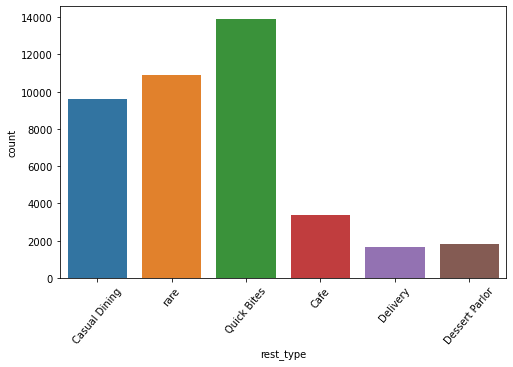

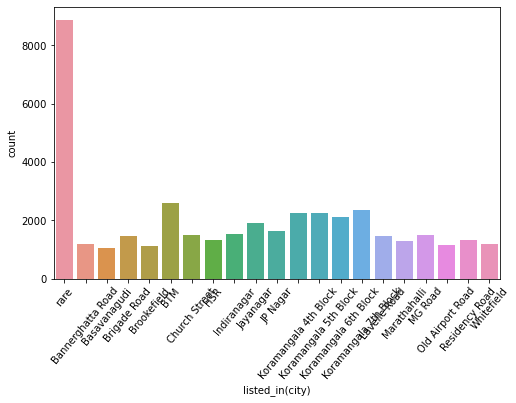

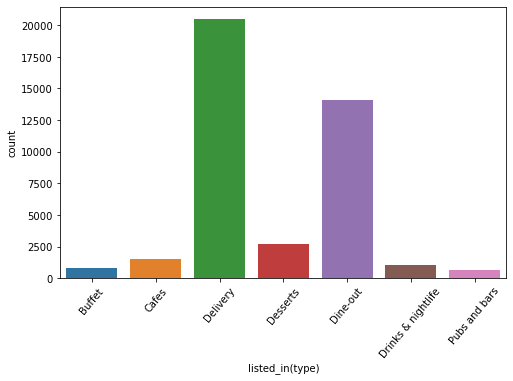

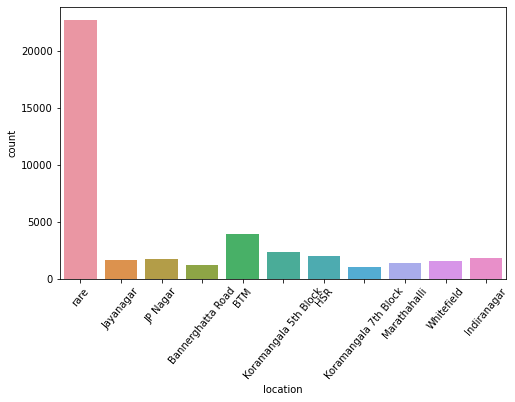

In [252]:
for i in cat:
    
    plt.figure(figsize=(8,5))
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=50)
 

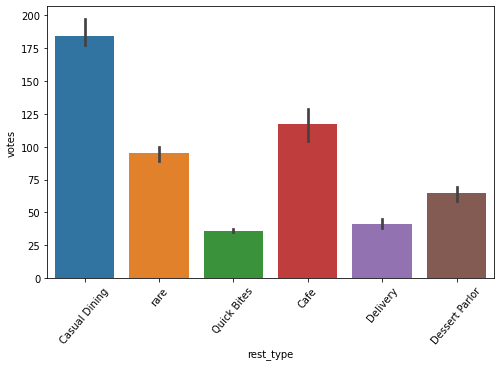

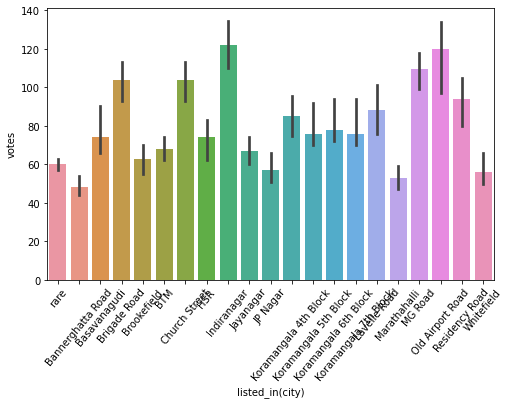

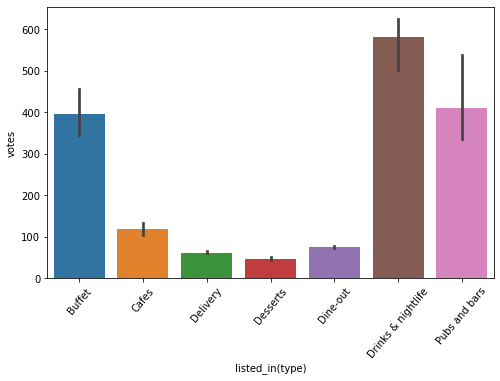

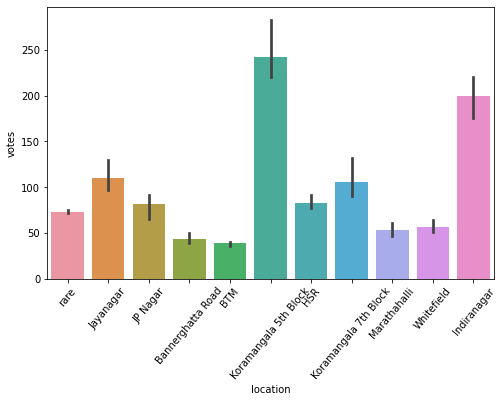

In [253]:
for i in cat:
    
    plt.figure(figsize=(8,5))
    sns.barplot(data=df,y=num[2],x=i,estimator=np.median)
    plt.xticks(rotation=50)

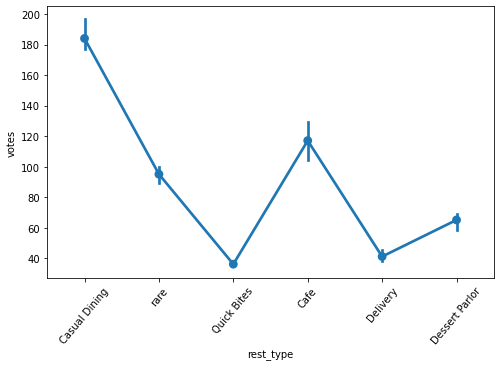

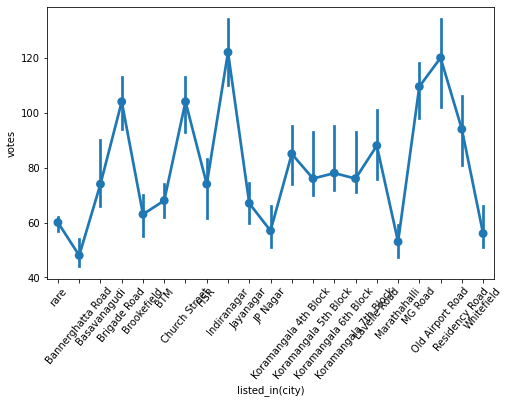

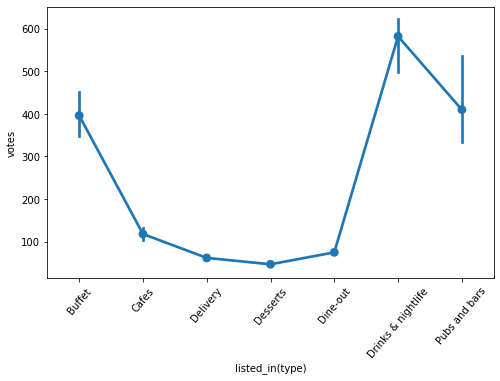

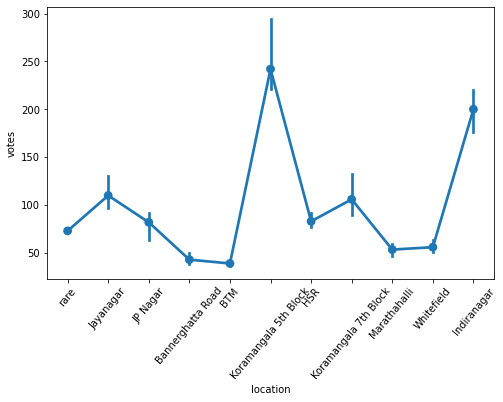

In [254]:
for i in cat:
    
    plt.figure(figsize=(8,5))
    sns.pointplot(data=df,y=num[2],x=i,estimator=np.median)
    plt.xticks(rotation=50)

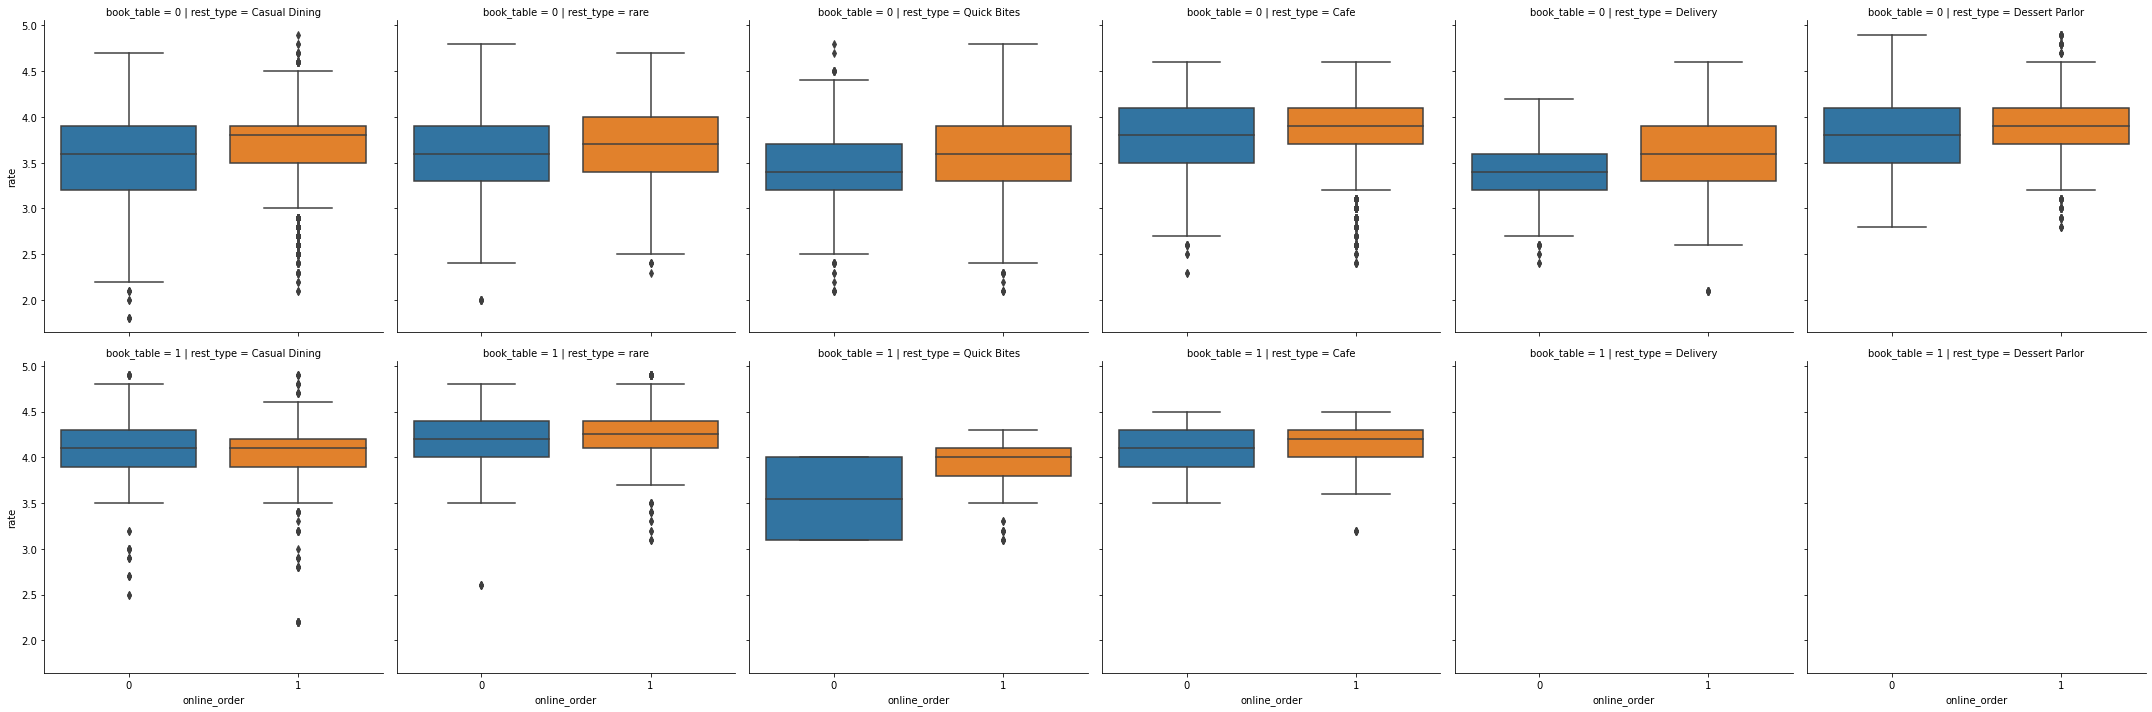

In [259]:
sns.catplot(data=df,x=ordi[0],y=num[0],kind='box',col=cat[0],row=ordi[1])

In [261]:
corr = df.corr()

<AxesSubplot:>

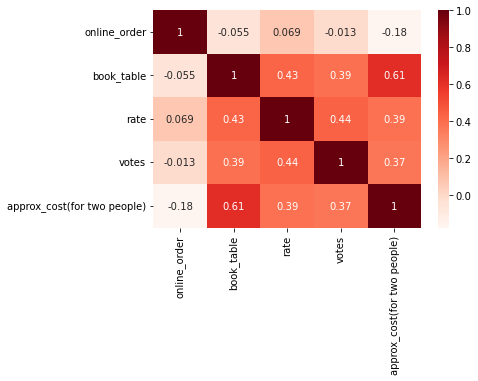

In [262]:
sns.heatmap(corr,cmap='Reds',annot=True)

In [268]:
l=num+ordi
corr_dic = {}

for i in range(len(l)):
    for j in range(i):
        
        a = l[i]
        b = l[j]
        
        score = np.corrcoef(df[a],df[b])[0,1]
        
        if abs(score)>0.3:
            corr_dic[a +' & '+b]=score

In [269]:
corr_dic

{'approx_cost(for two people) & rate': 0.385383638394101,
 'votes & rate': 0.43525639311752135,
 'votes & approx_cost(for two people)': 0.36655604904446953,
 'book_table & rate': 0.42606964633624983,
 'book_table & approx_cost(for two people)': 0.6142939270061132,
 'book_table & votes': 0.39318571466969343}

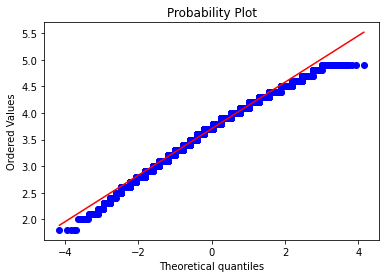

In [270]:
stats.probplot(df['rate'],plot=plt)
plt.show()

In [282]:
stats.anderson(np.sqrt(df['rate']))

AndersonResult(statistic=235.13480504635663, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [284]:
stats.shapiro(df[num[0]])

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9885328412055969, pvalue=0.0)

<AxesSubplot:xlabel='book_table', ylabel='rate'>

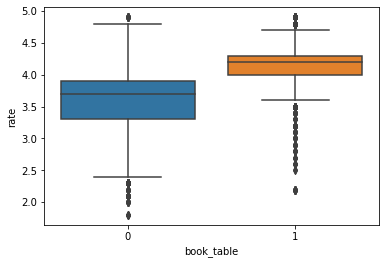

In [285]:
sns.boxplot(data=df,y=num[0],x=ordi[1])

In [286]:
df.groupby(ordi[1])[num[0]].mean()

book_table
0    3.622406
1    4.143464
Name: rate, dtype: float64

In [291]:
a = df.loc[(df[ordi[1]]==1),num[0]]
b = df.loc[(df[ordi[1]]==0),num[0]]

In [292]:

a.shape,b.shape

((6304,), (34959,))

In [ ]:
'''
ha : a>b
h0: a<=b

right tail test
alpha=0.05

In [302]:
stats.ttest_ind(a,b,equal_var=False,alternative='greater')

Ttest_indResult(statistic=118.46320342800519, pvalue=0.0)

In [303]:
stats.mannwhitneyu(a,b,alternative='greater')

MannwhitneyuResult(statistic=188875964.5, pvalue=0.0)

In [296]:
mean1 = a.mean()
mean2 = b.mean()
mean1,mean2

(4.143464467005119, 3.6224062473183247)

In [297]:
mean1 - mean2

0.5210582196867941

In [304]:
import random

In [305]:


def perf_func(df,n1,n2):
    
    n = n1 +n2
    idx1 = random.sample(range(n),n1)
    idx2 = list(set(range(n))-set(idx1))
    
    return df.iloc[idx1].mean() - df.iloc[idx2].mean()

In [306]:
d = pd.concat([a,b])

In [307]:
n1 = len(a)
n2 = len(b)

In [314]:
perf_func(d,n1,n2)

-0.004190383263356523

In [315]:
perm_diff = [perf_func(d,n1,n2) for _ in range(10000)]

In [317]:
np.mean((np.array(perm_diff)>(mean1-mean2)))

0.0

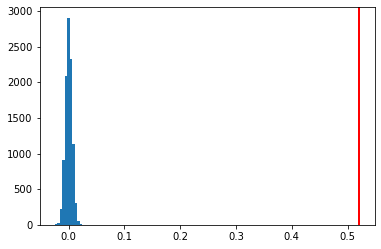

In [321]:
plt.hist(perm_diff,bins=11,rwidth=0.9)
plt.axvline(mean1-mean2,c='r',lw=2)

In [324]:
df.groupby(cat[0])[num[0]].mean()

rest_type
Cafe              3.848353
Casual Dining     3.740909
Delivery          3.571266
Dessert Parlor    3.878054
Quick Bites       3.545740
rare              3.811877
Name: rate, dtype: float64

In [328]:
ordi[1]

'book_table'

In [331]:
a = df.query("(book_table==1)")['online_order']
b = df.query("(book_table==0)")['online_order']

In [336]:
p1 = a.sum()/len(a)
p2 = b.sum()/len(b)
p1,p2

(0.5954949238578681, 0.6678680740295775)

In [337]:
pct_diff = (p2-p1)*100
pct_diff

7.237315017170943

In [ ]:
''' 
ha: b>a
h0: b<=a

right tail test
alpha=0.05

In [334]:
from statsmodels.stats import proportion

In [335]:
proportion.test_proportions_2indep(b.sum(),len(b),a.sum(),len(a),alternative='larger')

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 10.846877618166236
pvalue = 1.031773015366946e-27
compare = 'diff'
method = 'agresti-caffo'
diff = 0.07237315017170942
ratio = 1.1215344535648524
odds_ratio = 1.3659222256630503
variance = 4.454445759482549e-05
alternative = 'larger'
value = 0
tuple = (10.846877618166236, 1.031773015366946e-27)

In [339]:
ones = b.sum() + a.sum()
ones

27102

In [340]:
zeros = len(a)+len(b)-ones
zeros

14161

In [342]:
conv = [0]*zeros
conv.extend([1]*ones)


In [343]:
 d=pd.Series(conv)

In [348]:
perf_func(d,len(a),len(b))

0.0017716638475557822

In [349]:
diff = [100*perf_func(d,len(a),len(b)) for _ in range(10000)]

In [350]:
np.mean(diff>pct_diff)

0.0

In [361]:
v = df.groupby(cat[0])[num[0]].mean()
v

rest_type
Cafe              3.848353
Casual Dining     3.740909
Delivery          3.571266
Dessert Parlor    3.878054
Quick Bites       3.545740
rare              3.811877
Name: rate, dtype: float64

In [357]:
cafe = df[df[cat[0]]=='Cafe'][num[0]]
din = df[df[cat[0]]=='Casual Dining'][num[0]]
dil = df[df[cat[0]]=='Delivery'][num[0]]
bite = df[df[cat[0]]=='Quick Bites'][num[0]]
rare = df[df[cat[0]]=='rare'][num[0]]

In [358]:
stats.f_oneway(cafe,din,dil,bite,rare)

F_onewayResult(statistic=812.1317131481153, pvalue=0.0)

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

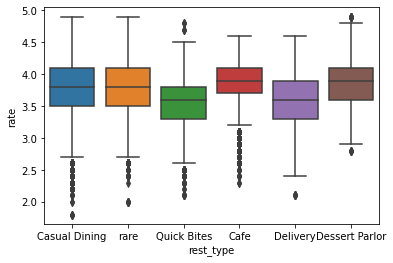

In [359]:
sns.boxplot(data=df,y='rate',x=cat[0])

In [360]:
stats.kruskal(cafe,din,dil,bite,rare)

KruskalResult(statistic=3609.691956378803, pvalue=0.0)

In [363]:
obs_var = v.var()
obs_var

0.020370960732690672

In [364]:
def anova(df):
    cc = df.copy()
    cc[cat[0]] = np.random.permutation(cc[cat[0]].values)
    cc = cc.groupby(cat[0])[num[0]].mean()
    return cc.var()

In [366]:
anova(df)

2.4202373154964668e-05

In [367]:
per_var =[anova(df) for _ in range(10000)]

In [369]:
np.mean(np.array(per_var)>obs_var)

0.0

In [370]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [371]:
r = pairwise_tukeyhsd(endog=df['rate'],groups=df[cat[0]],alpha=0.05)

In [372]:
print(r)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
          Cafe  Casual Dining  -0.1074    0.0 -0.1315 -0.0834   True
          Cafe       Delivery  -0.2771    0.0 -0.3131 -0.2411   True
          Cafe Dessert Parlor   0.0297  0.145 -0.0051  0.0645  False
          Cafe    Quick Bites  -0.3026    0.0 -0.3257 -0.2795   True
          Cafe           rare  -0.0365 0.0002 -0.0602 -0.0128   True
 Casual Dining       Delivery  -0.1696    0.0 -0.2015 -0.1377   True
 Casual Dining Dessert Parlor   0.1371    0.0  0.1066  0.1677   True
 Casual Dining    Quick Bites  -0.1952    0.0 -0.2111 -0.1792   True
 Casual Dining           rare    0.071    0.0  0.0541  0.0878   True
      Delivery Dessert Parlor   0.3068    0.0  0.2662  0.3474   True
      Delivery    Quick Bites  -0.0255 0.1805 -0.0567  0.0056  False
      Delivery           rare   0.

<AxesSubplot:xlabel='rest_type', ylabel='rate'>

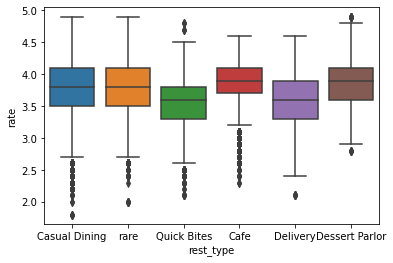

In [373]:
sns.boxplot(data=df,y='rate',x=cat[0])

In [374]:
p1,p2

(0.5954949238578681, 0.6678680740295775)

In [375]:
pct_diff

7.237315017170943

In [380]:
import statsmodels.api  as sm

In [386]:
effect_size = sm.stats.proportion_effectsize(p2,p1)
effect_size

0.15021617301898083

In [387]:
analysis = sm.stats.TTestIndPower()

In [389]:
result = analysis.solve_power(effect_size=effect_size,alpha=0.05,power=0.8,
                              alternative='larger')
result

548.6577034670388

In [393]:
len(a)

6304

In [394]:
len(b)

34959

In [396]:
import plotly.express as px
import plotly.io as pio

In [399]:
pio.renderers.default= 'browser'

In [402]:
px.density_heatmap(data_frame=df,x=cat[0],y=cat[2],z=num[0],color_continuous_scale='Reds',
        )

In [406]:
px.treemap(data_frame=df,path=[ordi[0],cat[0],num[0]])

In [414]:
px.scatter_matrix(data_frame=df,dimensions=[cat[0],cat[1]],color=num[0],size=num[2],
                 color_continuous_scale='Reds')

In [447]:
px.line_polar(data_frame=df,theta=cat[0],r=num[0],color=cat[2],
                )

In [423]:
px.box(data_frame=df,y=num[0],x=cat[0])

In [427]:
px.scatter_3d(data_frame=df,x=num[0],y=num[1],z=num[2],hover_data=[cat[0]])

In [429]:
px.box(data_frame=df,y=[num[0],num[1]],points='all')

In [433]:
px.density_heatmap(data_frame=df,x=cat[0],y=cat[2],z=num[0],
        marginal_x='histogram',marginal_y='histogram')

In [442]:
px.scatter_matrix(data_frame=df[num+[cat[0]]],color=num[0],color_continuous_scale='Reds')

In [450]:
df['reviews_list'][0]

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [451]:
import re

In [484]:
c = re.compile('[(\\\.,)(?\]\[\\\']|(RATED)|(Rated)|(\d)')

In [487]:
df['reviews_list'] = df['reviews_list'].apply(lambda x:c.sub('',x))

In [522]:
df['reviews_list'].to_csv('../data/review.csv')

In [506]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [497]:
tfidf = TfidfVectorizer(max_features=100,stop_words='english')

In [498]:
tfidf.fit(df['reviews_list'])

TfidfVectorizer(max_features=100, stop_words='english')

In [499]:
tf = tfidf.transform(df['reviews_list'])

In [500]:
tf = pd.DataFrame(tf.toarray(),columns=tfidf.get_feature_names_out())

In [501]:
tf

,amazing,ambiance,ambience,average,awesome,bad,bangalore,beer,best,better,...,try,veg,visit,visited,went,worth,xfã,xs,xã,zomato
0,0.037172,0.045752,0.140580,0.000000,0.000000,0.000000,0.000000,0.000000,0.064950,0.000000,...,0.089699,0.037827,0.034502,0.087137,0.083261,0.037688,0.000000,0.04822,0.756484,0.00000
1,0.037236,0.045831,0.140823,0.128513,0.000000,0.125834,0.000000,0.000000,0.065062,0.000000,...,0.149757,0.075785,0.034562,0.000000,0.041702,0.000000,0.000000,0.00000,0.000000,0.09127
2,0.028073,0.000000,0.185799,0.096890,0.000000,0.031623,0.032339,0.000000,0.024526,0.029705,...,0.112906,0.000000,0.130287,0.098713,0.031441,0.028463,0.000000,0.00000,0.380880,0.00000
3,0.000000,0.018222,0.041992,0.017032,0.031861,0.000000,0.000000,0.000000,0.038802,0.093991,...,0.035725,0.030132,0.109932,0.086761,0.033161,0.060041,0.000000,0.00000,0.301290,0.00000
4,0.000000,0.000000,0.285918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41258,0.000000,0.000000,0.101521,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113616,...,0.000000,0.327808,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
41259,0.044932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082863,0.000000,0.000000,...,0.000000,0.091450,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.957963,0.00000
41260,0.061878,0.304647,0.117009,0.142374,0.133169,0.069703,0.142562,0.000000,0.270299,0.000000,...,0.099546,0.125939,0.114869,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
41261,0.007321,0.000000,0.006922,0.000000,0.015757,0.016494,0.000000,0.000000,0.012793,0.000000,...,0.000000,0.007451,0.020387,0.008581,0.000000,0.000000,0.053917,0.00000,0.993322,0.00000


In [503]:
tf.index = df.index

In [512]:
tf.to_csv('../data/tfidf.csv')

In [507]:
count = CountVectorizer(stop_words='english',max_features=100)
count.fit(df['reviews_list'])

CountVectorizer(max_features=100, stop_words='english')

In [508]:
cc = count.transform(df['reviews_list'])

In [509]:
cc = pd.DataFrame(cc.toarray(),columns=count.get_feature_names_out())

In [511]:
cc.to_csv('../data/count.csv')

In [513]:
import joblib

In [514]:
joblib.dump(tfidf,'transformer_tfidf')

['transformer_tfidf']

In [515]:
joblib.dump(count,'transformer_count')

['transformer_count']

In [520]:
cc.sum(axis=0).sort_values(ascending=False)[:20]

xã          8141617
place        926690
good         867055
food         840460
chicken      381316
service      300348
ordered      294113
great        259439
really       245980
ambience     244227
taste        241628
try          214007
time         202635
nice         201204
like         197074
just         191055
visit        180356
best         179709
staff        150765
amazing      147086
dtype: int64

In [521]:
tf.sum(axis=0).sort_values(ascending=False)[:20]

xã            12940.714484
good           6240.444824
food           6236.181864
place          6171.058821
chicken        3929.501178
ordered        2883.548337
taste          2811.417433
service        2368.823072
really         2208.594014
try            2153.707689
biryani        2108.194400
like           2034.361291
great          1999.369092
just           1919.118966
restaurant     1844.317266
nice           1830.490317
time           1827.343805
best           1799.768622
ambience       1789.427214
order          1769.353952
dtype: float64

In [523]:
g = df.groupby([cat[0],ordi[0],ordi[1]])

In [525]:
g['rate'].agg(['mean','median'])

mean  median
rest_type      online_order book_table                  
Cafe           0            0           3.738369    3.80
                            1           4.085000    4.10
               1            0           3.829966    3.90
                            1           4.134112    4.20
Casual Dining  0            0           3.516438    3.60
                            1           4.113937    4.10
               1            0           3.663730    3.80
                            1           4.064158    4.10
Delivery       0            0           3.386503    3.40
               1            0           3.616182    3.60
Dessert Parlor 0            0           3.794073    3.80
               1            0           3.911153    3.90
Quick Bites    0            0           3.443820    3.40
                            1           3.550000    3.55
               1            0           3.588298    3.60
                            1           3.885393    4.00
rare           0            0           3.624697    3.60
                            1           4.186879    4.20
               1            0           3.672746    3.70
                            1           4.235755    4.25